In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.under_sampling import NearMiss
df = pd.read_csv('../data/session_train_data.csv')
print df.shape

(8971, 378)


## replace all number and drop NaN

In [21]:
# replace all unknown data with non
df.replace('-unknown-', np.nan, inplace=True)

df = df.dropna()
#drop all nan data

df.shape

(3873, 378)

In [22]:
gender_relat_data = df

In [23]:
gender_relat_data.shape

(3873, 378)

# under sampling age 30

In [24]:

#30 data for under sampling
thir_X = gender_relat_data
#other data for upsampling
thir_Y = thir_X.gender
thir_X.drop(['id','gender','date_account_created','country_destination'],1,inplace=True)
thir_X.shape

(3873, 374)

In [25]:
# thir_X.head(5)

In [26]:
oh_signup_method = pd.get_dummies(thir_X.signup_method, prefix="signup_method")
oh_language = pd.get_dummies(thir_X.language, prefix="language")
oh_signup_flow = pd.get_dummies(thir_X.signup_flow, prefix="signup_flow")
oh_affiliate_channel = pd.get_dummies(thir_X.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(thir_X.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(thir_X.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(thir_X.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(thir_X.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(thir_X.first_browser, prefix="first_browser")
thir_X.drop(['signup_method','language', 'signup_flow',
          'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
thir_X.shape
thir_X = pd.concat([thir_X,oh_signup_method,oh_language,
                    oh_affiliate_channel,oh_affiliate_provider,
                    oh_first_affiliate_tracked,oh_first_browser],axis=1)


In [27]:
column_list = ['timestamp_first_active', 'age', 'action_10', 'action_11',
       'action_12', 'action_15', 'action_about_us', 'action_account',
       'action_active', 'action_add_guests', 'action_add_note',
       'action_airbnb_picks', 'action_ajax_check_dates',
       'action_ajax_get_results', 'action_ajax_google_translate',
       'action_ajax_google_translate_description',
       'action_ajax_google_translate_reviews', 'action_ajax_image_upload',
       'action_ajax_ldp', 'action_ajax_lwlb_contact',
       'action_ajax_payout_edit', 'action_ajax_payout_options_by_country',
       'action_ajax_photo_widget_form_iframe',
       'action_ajax_price_and_availability',
       'action_ajax_refresh_subtotal', 'action_ajax_send_message',
       'action_ajax_statsd', 'action_ajax_worth', 'action_apply',
       'action_apply_code', 'action_apply_reservation',
       'action_ask_question', 'action_at_checkpoint',
       'action_authenticate', 'action_authorize', 'action_available',
       'action_badge', 'action_become_user', 'action_calendar_tab_inner2',
       'action_callback', 'action_campaigns', 'action_cancel',
       'action_cancellation_policies', 'action_change',
       'action_change_availability', 'action_change_currency',
       'action_change_default_payout', 'action_change_password',
       'action_clear_reservation', 'action_clickthrough',
       'action_collections', 'action_complete', 'action_complete_redirect',
       'action_complete_status', 'action_concierge',
       'action_confirm_email', 'action_connect', 'action_contact_new',
       'action_countries', 'action_country_options', 'action_create',
       'action_create_ach', 'action_create_multiple',
       'action_create_paypal', 'action_currencies', 'action_dashboard',
       'action_decision_tree', 'action_delete', 'action_department',
       'action_departments', 'action_destroy', 'action_detail_-unknown-',
       'action_detail_account_notification_settings',
       'action_detail_account_payout_preferences',
       'action_detail_account_privacy_settings',
       'action_detail_account_transaction_history',
       'action_detail_admin_templates',
       'action_detail_airbnb_picks_wishlists',
       'action_detail_alteration_field',
       'action_detail_alteration_request', 'action_detail_apply_coupon',
       'action_detail_at_checkpoint', 'action_detail_calculate_worth',
       'action_detail_cancellation_policies',
       'action_detail_change_contact_host_dates',
       'action_detail_change_or_alter', 'action_detail_change_password',
       'action_detail_change_trip_characteristics',
       'action_detail_confirm_email', 'action_detail_confirm_email_link',
       'action_detail_contact_host',
       'action_detail_create_alteration_request',
       'action_detail_create_listing',
       'action_detail_create_phone_numbers', 'action_detail_create_user',
       'action_detail_dashboard', 'action_detail_delete_listing',
       'action_detail_delete_listing_description',
       'action_detail_delete_phone_numbers', 'action_detail_edit_profile',
       'action_detail_email_wishlist',
       'action_detail_email_wishlist_button',
       'action_detail_forgot_password', 'action_detail_friends_wishlists',
       'action_detail_guest_cancellation', 'action_detail_guest_itinerary',
       'action_detail_guest_receipt', 'action_detail_header_userpic',
       'action_detail_homepage', 'action_detail_host_guarantee',
       'action_detail_host_home', 'action_detail_list_your_space',
       'action_detail_listing_reviews',
       'action_detail_listing_reviews_page', 'action_detail_login',
       'action_detail_login_modal', 'action_detail_login_page',
       'action_detail_lookup_message_thread',
       'action_detail_manage_listing', 'action_detail_message_inbox',
       'action_detail_message_post', 'action_detail_message_thread',
       'action_detail_nan', 'action_detail_notifications',
       'action_detail_oauth_login', 'action_detail_oauth_response',
       'action_detail_p1', 'action_detail_p3', 'action_detail_p5',
       'action_detail_payment_instruments', 'action_detail_pending',
       'action_detail_place_worth', 'action_detail_popular_wishlists',
       'action_detail_post_checkout_action',
       'action_detail_previous_trips', 'action_detail_profile_references',
       'action_detail_profile_verifications',
       'action_detail_remove_dashboard_alert',
       'action_detail_request_new_confirm_email',
       'action_detail_reservations',
       'action_detail_respond_to_alteration_request',
       'action_detail_send_message', 'action_detail_set_password',
       'action_detail_set_password_page', 'action_detail_signup',
       'action_detail_signup_login_page', 'action_detail_signup_modal',
       'action_detail_similar_listings', 'action_detail_terms_and_privacy',
       'action_detail_toggle_archived_thread',
       'action_detail_toggle_starred_thread',
       'action_detail_translate_listing_reviews',
       'action_detail_translations', 'action_detail_trip_availability',
       'action_detail_unavailable_dates', 'action_detail_update_listing',
       'action_detail_update_listing_description',
       'action_detail_update_user', 'action_detail_update_user_profile',
       'action_detail_user_friend_recommendations',
       'action_detail_user_listings', 'action_detail_user_profile',
       'action_detail_user_profile_content_update',
       'action_detail_user_reviews',
       'action_detail_user_social_connections',
       'action_detail_user_tax_forms', 'action_detail_user_wishlists',
       'action_detail_view_search_results', 'action_detail_wishlist',
       'action_detail_wishlist_content_update',
       'action_detail_wishlist_note', 'action_detail_your_listings',
       'action_detail_your_reservations', 'action_detail_your_trips',
       'action_detect_fb_session', 'action_domains', 'action_edit',
       'action_edit_verification', 'action_email_itinerary_colorbox',
       'action_email_share', 'action_email_wishlist',
       'action_facebook_auto_login', 'action_faq', 'action_faq_category',
       'action_faq_experiment_ids', 'action_feed',
       'action_forgot_password', 'action_founders', 'action_friends',
       'action_friends_new', 'action_glob', 'action_google_importer',
       'action_guarantee', 'action_guest_booked_elsewhere',
       'action_has_profile_pic', 'action_header_userpic',
       'action_hospitality', 'action_hospitality_standards',
       'action_host_2013', 'action_host_summary',
       'action_hosting_social_proof', 'action_identity',
       'action_image_order', 'action_index', 'action_invalid_action',
       'action_issue', 'action_itinerary', 'action_jumio',
       'action_jumio_redirect', 'action_jumio_token', 'action_kba',
       'action_kba_update', 'action_languages_multiselect',
       'action_listing', 'action_listings', 'action_locale_from_host',
       'action_localization_settings', 'action_locations', 'action_login',
       'action_login_modal', 'action_lookup', 'action_manage_listing',
       'action_maybe_information', 'action_message',
       'action_mobile_landing_page', 'action_multi',
       'action_multi_message', 'action_multi_message_attributes',
       'action_my', 'action_my_listings', 'action_nan', 'action_new',
       'action_new_session', 'action_notifications',
       'action_office_location', 'action_open_graph_setting',
       'action_other_hosting_reviews',
       'action_other_hosting_reviews_first', 'action_overview',
       'action_pay', 'action_payment_instruments',
       'action_payment_methods', 'action_payoneer_account_redirect',
       'action_payoneer_signup_complete', 'action_payout_preferences',
       'action_payout_update', 'action_pending', 'action_pending_tickets',
       'action_personalize', 'action_phone_number_widget',
       'action_phone_verification_modal', 'action_photography',
       'action_photography_update', 'action_place_worth', 'action_popular',
       'action_popular_listing', 'action_populate_from_facebook',
       'action_populate_help_dropdown', 'action_position',
       'action_preapproval', 'action_press_release', 'action_pricing',
       'action_privacy', 'action_profile_pic',
       'action_push_notification_callback', 'action_qt2',
       'action_qt_reply_v2', 'action_qt_with', 'action_rate',
       'action_receipt', 'action_recent_reservations', 'action_recommend',
       'action_recommendations', 'action_redirect', 'action_references',
       'action_referrer_status', 'action_relationship',
       'action_remove_dashboard_alert', 'action_rentals',
       'action_reputation', 'action_request_new_confirm_email',
       'action_request_photography', 'action_requested',
       'action_requirements', 'action_respond', 'action_review_page',
       'action_reviews', 'action_reviews_new', 'action_salute',
       'action_search', 'action_search_results', 'action_set_password',
       'action_set_user', 'action_settings', 'action_show',
       'action_show_personalize', 'action_signature',
       'action_signup_login', 'action_signup_modal',
       'action_similar_listings', 'action_slideshow', 'action_social',
       'action_social_connections', 'action_southern-europe',
       'action_status', 'action_submit_contact', 'action_supported',
       'action_tell_a_friend', 'action_terms',
       'action_terms_and_conditions', 'action_this_hosting_reviews',
       'action_toggle_archived_thread', 'action_toggle_availability',
       'action_toggle_starred_thread', 'action_tos_confirm',
       'action_track_page_view', 'action_transaction_history',
       'action_transaction_history_paginated', 'action_travel',
       'action_travel_plans_current', 'action_travel_plans_previous',
       'action_trust', 'action_type_-unknown-',
       'action_type_booking_request', 'action_type_click',
       'action_type_data', 'action_type_message_post', 'action_type_nan',
       'action_type_partner_callback', 'action_type_submit',
       'action_type_view', 'action_unavailabilities', 'action_unread',
       'action_update', 'action_update_cached',
       'action_update_friends_display',
       'action_update_hide_from_search_engines',
       'action_update_notifications',
       'action_update_reservation_requirements', 'action_upload',
       'action_uptodate', 'action_verify', 'action_webcam_upload',
       'action_why_host', 'action_widget', 'action_zendesk_login_jwt',
       'device_type_-unknown-',
       'device_type_Android App Unknown Phone/Tablet',
       'device_type_Android Phone', 'device_type_Blackberry',
       'device_type_Chromebook', 'device_type_Linux Desktop',
       'device_type_Mac Desktop', 'device_type_Opera Phone',
       'device_type_Tablet', 'device_type_Windows Desktop',
       'device_type_Windows Phone', 'device_type_iPad Tablet',
       'device_type_iPhone', 'device_type_iPodtouch', 'secs_elapsed_max',
       'secs_elapsed_mean', 'secs_elapsed_min', 'secs_elapsed_std',
       'secs_elapsed_sum', 'signup_method_basic', 'signup_method_facebook',
       'language_cs', 'language_da', 'language_de', 'language_el',
       'language_en', 'language_es', 'language_fr', 'language_id',
       'language_is', 'language_it', 'language_ja', 'language_ko',
       'language_nl', 'language_pl', 'language_pt', 'language_ru',
       'language_sv', 'language_th', 'language_tr', 'language_zh',
       'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'affiliate_provider_baidu', 'affiliate_provider_bing',
       'affiliate_provider_direct', 'affiliate_provider_email-marketing',
       'affiliate_provider_facebook',
       'affiliate_provider_facebook-open-graph',
       'affiliate_provider_google', 'affiliate_provider_gsp',
       'affiliate_provider_other', 'affiliate_provider_padmapper',
       'affiliate_provider_vast', 'affiliate_provider_yahoo',
       'first_affiliate_tracked_linked',
       'first_affiliate_tracked_marketing', 'first_affiliate_tracked_omg',
       'first_affiliate_tracked_product',
       'first_affiliate_tracked_tracked-other',
       'first_affiliate_tracked_untracked', 'first_browser_AOL Explorer',
       'first_browser_Android Browser', 'first_browser_Apple Mail',
       'first_browser_BlackBerry Browser', 'first_browser_Chrome',
       'first_browser_Chrome Mobile', 'first_browser_Chromium',
       'first_browser_Firefox', 'first_browser_IE',
       'first_browser_Mobile Safari', 'first_browser_Opera',
       'first_browser_Opera Mini', 'first_browser_Safari',
       'first_browser_SeaMonkey', 'first_browser_Silk',
       'first_browser_SiteKiosk', 'first_browser_Sogou Explorer',
       'first_browser_TenFourFox', 'first_browser_wOSBrowser']

In [28]:
for key in column_list:
    if key not in df.columns:
        thir_X[key] = 0

In [29]:
thir_X.shape

(3873, 432)

In [30]:
nm1 = NearMiss(ratio={'MALE':1795, 'FEMALE':1795},random_state=4, version =2)
Xthir_resample,Ythir_resample = nm1.fit_sample(thir_X,thir_Y)

In [31]:
df_xthir = pd.DataFrame(Xthir_resample)
df_ythir = pd.DataFrame(Ythir_resample,columns = ['gender'])
#df_ythir['gender'].value_counts()
df_other = pd.concat([df_xthir,df_ythir],axis=1)
df_other.shape

(3599, 433)

In [13]:
# df_other.head(5)

# over sampling male in other ages

In [72]:
gender_relat_data.shape
other_Y = gender_relat_data.gender

gender_relat_data.drop(['id','gender','date_account_created','country_destination'],1,inplace=True)


AttributeError: 'DataFrame' object has no attribute 'gender'

In [32]:
gender_relat_data.shape

(3873, 365)

In [33]:
oh_signup_method = pd.get_dummies(gender_relat_data.signup_method, prefix="signup_method")
oh_language = pd.get_dummies(gender_relat_data.language, prefix="language")
oh_affiliate_channel = pd.get_dummies(gender_relat_data.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(gender_relat_data.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(gender_relat_data.first_affiliate_tracked, prefix="first_affiliate_tracked")
#oh_signup_app = pd.get_dummies(gender_relat_data.signup_app, prefix="signup_app")
#oh_first_device_type = pd.get_dummies(gender_relat_data.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(gender_relat_data.first_browser, prefix="first_browser")
gender_relat_data.drop(['signup_method', 'signup_method', 'signup_flow',
         'language', 'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
gender_relat_data.shape
gender_relat_data = pd.concat([gender_relat_data,oh_signup_method,oh_language,
                    oh_affiliate_channel,oh_affiliate_provider,
                    oh_first_affiliate_tracked,oh_first_browser],axis=1)

AttributeError: 'DataFrame' object has no attribute 'signup_method'

In [79]:
other_X = gender_relat_data

In [80]:
from imblearn.over_sampling import SMOTE


In [81]:
other_Y.value_counts()

FEMALE    52828
MALE      44942
OTHER       209
Name: gender, dtype: int64

In [82]:
sm = SMOTE({'FEMALE':52828,'MALE':52828,'OTHER':209},kind='borderline2')
Xother_resamp,Yother_resamp = sm.fit_sample(other_X,other_Y)

In [83]:
df_yother = pd.DataFrame(Yother_resamp,columns = ['gender'])
df_yother.shape

(105864, 1)

In [84]:
df_yother = pd.DataFrame(Yother_resamp,columns = ['gender'])
df_yother['gender'].value_counts()

FEMALE    52828
MALE      52827
OTHER       209
Name: gender, dtype: int64

In [85]:
df_xother = pd.DataFrame(Xother_resamp)

In [86]:
df_other = pd.concat([df_xother,df_yother],axis=1)
df_other.shape

(105864, 103)

## merge other and 30 age group

In [21]:
# df_whole =  pd.concat([df_other,df_thir],axis=0)
# df_whole.shape

In [22]:
# df_whole['gender'].value_counts()

In [23]:
# df_whole = df_whole.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [24]:
# from sklearn.utils import shuffle
# df_whole = shuffle(df_whole)

# seperate features and samples

In [34]:
df_whole_Y = df_other['gender']

In [35]:
df_other.drop(['gender'],1,inplace=True)

In [36]:
df_whole_X = df_other

In [37]:
df_other.shape

(3599, 432)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_whole_X, df_whole_Y, test_size=0.3)

## DECISION TREE TO PREDICT GENDER

In [39]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
result_lable = ['MALE','FEMALE','OTHER']

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=10)
clf = clf.fit(x_train,y_train)

In [40]:
y_predict = clf.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.55        0.54174397  0.        ]
0.545393303786
0.54537037037


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


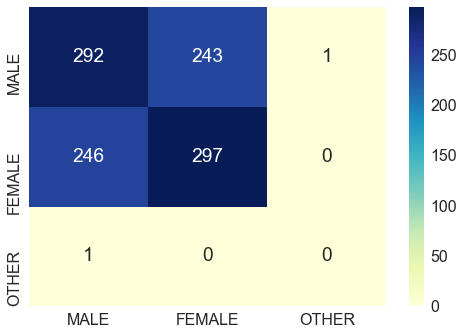

In [41]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.set(font_scale=1.6)
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")

## fill the missing gender with the classifier

In [51]:
all_samples = pd.read_csv('../data/session_train_data.csv')

all_gender = all_samples.gender
all_samples.drop(['id','gender','date_account_created','country_destination'],1,inplace=True)

all_samples.drop(all_samples.index[len(all_samples)-1])
all_samples.shape

(8971, 374)

In [52]:
all_samples.replace('-unknown-',np.nan, inplace=True)
all_samples.age[all_samples.age >120] = np.nan
df.replace([np.inf, -np.inf], np.nan)
all_samples.fillna(method = "bfill", inplace=True)
all_samples.fillna(method = "ffill", inplace=True)
all_samples.shape

/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(8971, 374)

In [53]:
oh_signup_method = pd.get_dummies(all_samples.signup_method, prefix="signup_method")
oh_language = pd.get_dummies(all_samples.language, prefix="language")
oh_signup_flow = pd.get_dummies(all_samples.signup_flow, prefix="signup_flow")
oh_affiliate_channel = pd.get_dummies(all_samples.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(all_samples.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(all_samples.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(all_samples.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(all_samples.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(all_samples.first_browser, prefix="first_browser")
all_samples.drop(['signup_method','language', 'signup_flow',
          'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)

all_samples = pd.concat([all_samples,oh_signup_method,oh_language,
                    oh_affiliate_channel,oh_affiliate_provider,
                    oh_first_affiliate_tracked,oh_first_browser,all_gender],axis=1)
all_samples.shape

(8971, 433)

In [54]:
lis = all_samples.columns.get_values()
lis

array(['timestamp_first_active', 'age', 'action_10', 'action_11',
       'action_12', 'action_15', 'action_about_us', 'action_account',
       'action_active', 'action_add_guests', 'action_add_note',
       'action_airbnb_picks', 'action_ajax_check_dates',
       'action_ajax_get_results', 'action_ajax_google_translate',
       'action_ajax_google_translate_description',
       'action_ajax_google_translate_reviews', 'action_ajax_image_upload',
       'action_ajax_ldp', 'action_ajax_lwlb_contact',
       'action_ajax_payout_edit', 'action_ajax_payout_options_by_country',
       'action_ajax_photo_widget_form_iframe',
       'action_ajax_price_and_availability',
       'action_ajax_refresh_subtotal', 'action_ajax_send_message',
       'action_ajax_statsd', 'action_ajax_worth', 'action_apply',
       'action_apply_code', 'action_apply_reservation',
       'action_ask_question', 'action_at_checkpoint',
       'action_authenticate', 'action_authorize', 'action_available',
       'action_ba

In [55]:

result_sample = pd.read_csv('../data/session_train_data.csv')


for i, row in all_samples.iterrows():
    if row["gender"] == "-unknown-":
        sample = all_samples.loc[i]
        sample.drop(['gender'],inplace=True)
        sample = np.reshape(sample, (1, -1))
        print i 
        gender = clf.predict(sample)[0]
        result_sample.set_value(i,'gender',gender)
        
#   if row["gender"]:
#     ifor_val = something_else
#   df.set_value(i,'ifor',ifor_val)

8
9
10
12
14
16
18
20
25
27
31
33
34
39
40
41
45
46
49
53
57
58
61
62
67
68
71
75
76
81
82
83
85
88
91
92
93
96
97
98
99
101
103
104
107
108
110
111
112
115
117
118
120
121
122
125
126
127
129
131
132
133
134
137
138
139
142
143
144
147
148
150
152
153
155
156
160
161
163
164
166
168
169
172
174
176
177
183
187
188
191
192
195
196
197
200
202
203
204
205
206
208
209
210
211
213
214
216
218
223
225
226
229
230
231
234
235
236
239
241
242
244
245
248
249
250
251
253
257
258
260
262
264
265
267
268
269
271
273
275
277
280
282
284
286
287
288
297
301
302
303
304
307
311
312
313
315
317
321
322
323
324
326
327
328
332
333
334
336
341
342
343
344
345
346
349
350
351
352
358
359
360
362
372
375
376
379
381
382
385
387
388
390
391
393
400
401
403
404
405
407
409
410
411
413
414
416
418
420
421
422
423
424
433
434
435
436
438
446
450
451
452
453
454
455
456
458
459
460
464
466
467
470
474
478
479
480
481
485
489
495
500
504
507
512
513
514
516
518
520
521
524
526
527
531
532
536
537
539
540
542

In [60]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('sesion_joind_gender.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
result_sample.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()
        